<a href="https://colab.research.google.com/github/ZoryAce/Topicos/blob/main/Taller3_NNKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 5
## Neural Networks in Keras and Pytorch 🔥

Use keras framework to solve the below exercises.


1. Instalacion de librerias de tensorflow y demas necesarias para la red
neuronal

In [31]:
!pip install livelossplot
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from livelossplot import PlotLossesKeras
from tensorflow.keras.layers import Dense, Input

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# 5 Moons Dataset

**Exercise:** Use keras and pytorch framework to find a decision boundary for point in the make_moons.

2. Creación de dataset make_moons desde sklearn, división del dataset de datos en entrenamiento (70%) y test (30%)


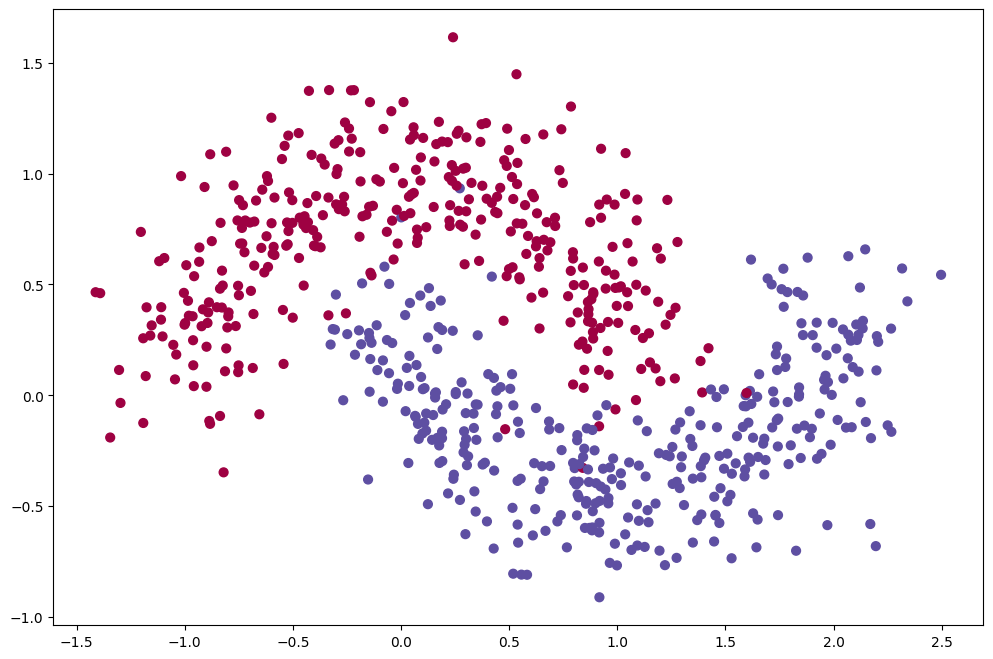

In [32]:
# Create moons dataset.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

3. Estandarización de los datos

In [33]:
scaler = StandardScaler()

4. Conversión de la variable y en categorica

In [34]:
y = to_categorical(y)

5. Normalización de los datos de entrenamiento y test


In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Creación del modelo de red neuronal secuencial con 1 capa con 5 neuronas con 2 entradas, función de activación ReLU, capa de salida con 1 neurona con una funcion de activación "sigmoide" que da una salida de 0 o 1.


In [36]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='relu'))  # Capa oculta con 5 neuronas y función de activación ReLU
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7. Resumen de la arquitectura del modelo secuencia, nombre y tipo de capa, cantidad de neuronas y número de parametros

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

8. configuración de tipo de optimizadorque utilizará el modelo el cual es "Adam", función de perdida "binary_crossentropy" y metricas de medición que en este caso es el "accuracy"


In [38]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

9. graficos de evolución de funcion de perdida y ganancia de precisión a través del entrenamiento

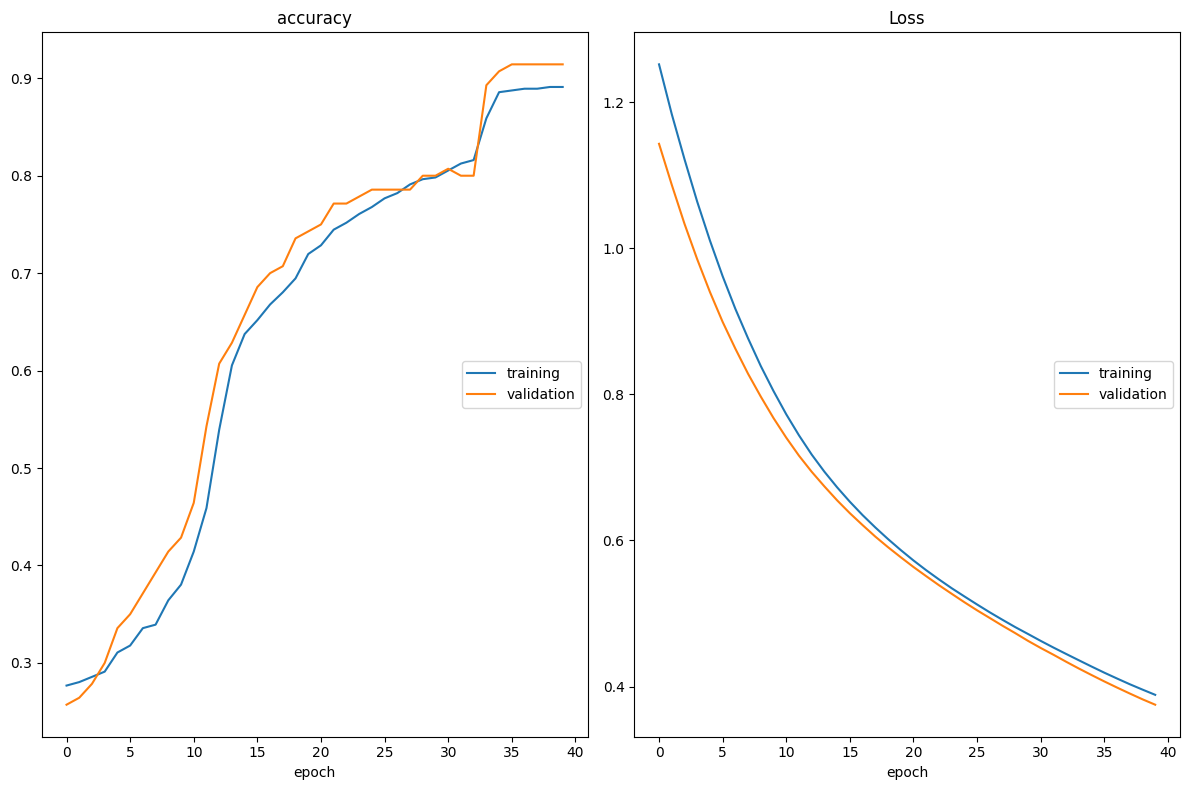

accuracy
	training         	 (min:    0.277, max:    0.891, cur:    0.891)
	validation       	 (min:    0.257, max:    0.914, cur:    0.914)
Loss
	training         	 (min:    0.389, max:    1.252, cur:    0.389)
	validation       	 (min:    0.375, max:    1.143, cur:    0.375)
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8751 - loss: 0.3893 - val_accuracy: 0.9143 - val_loss: 0.3751


In [39]:
moon_model = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2, verbose=1, callbacks=[PlotLossesKeras()])

10. Evaluación del modelo en dataset de test, accuracy de 83.67% y perdida de 0.33 indica un buen rendimiento del modelo para este tipo de dataset


In [40]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8523 - loss: 0.4163 


[0.40789711475372314, 0.8633333444595337]

# 5.1 Decision Boundary -- Keras

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

**Hint:** Use the next function to plt the decision boundary,

In [41]:
import matplotlib.pyplot as pl

11. Funcion plot_decision_boundary para visualizar las imagenes de decisión,

6698/6698 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


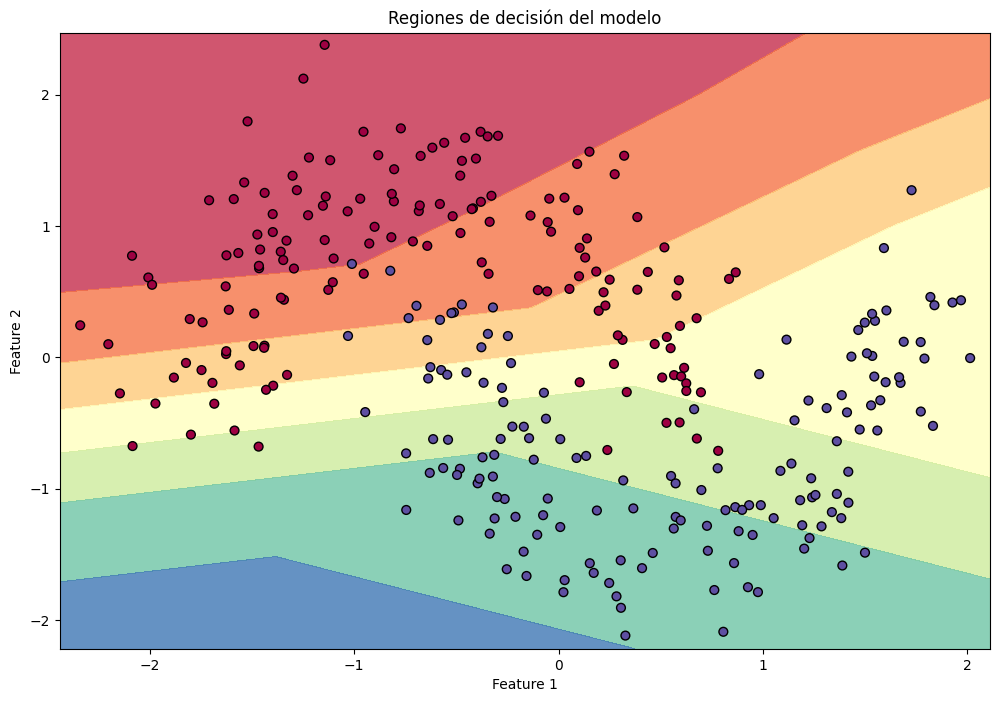

In [42]:
def plot_decision_boundary(model, x, y):
    # Define el rango de valores para la malla
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Genera predicciones para la malla
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)

    # Visualiza las regiones de decisión
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Regiones de decisión del modelo")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualiza las predicciones del modelo
plot_decision_boundary(model, X_test, y_test)

# **Analisis de los resultados:**

El modelo de red neuronal con keras, identifica patrones complejos teniendo en cuenta que utiliza los tonos degrade en aquellas zonas que presenta incertidumbre.

Colocando en la zona roja la clase 1 (puntos rojos) y la clase 0 (puntos azules) en la zona azul, de acuerdo a su precisión puede observarse que predice bien los resultados, con un riesgo bajo de overfiting

# 5.2 Decision Boundary -- PyTorch 🔥

**Exercise:** Use PyTorch to find a decision boundary for point in the make_moons.

**Hint:** Use the next function to plt the decision boundary,

Uso de pytorch para el manejo de tensores


In [43]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline

Normalización de los datos

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

conversión de datos de entrenamiento y test en Tensores

In [45]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

DEFINICION DEL MODELO

nn.Linear: Capa densa (fully connected) que aplica una transformación lineal
nn.ReLU: Función de activación ReLU (Rectified Linear Unit), que introduce no linealidad.

Capas del modelo:

input_layer: Capa de entrada con 128 neuronas.
hidden_layer1: Capa oculta con 64 neuronas.
output_layer: Capa de salida con output_dim neuronas.

In [46]:
class Model(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Model, self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [47]:
input_dim  = 2
output_dim = 2
model = Model(input_dim,output_dim)

Tasa de aprendizaje, función de perdida para calcular el error, y optimizador Adam

In [48]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

Se define el modelo de entrenamiento:

1.Borra gradientes,
2.Predice datos de entrenamiento,
3.Calcula pérdida de entrenamiento,
4.Calcula gradientes,
5.Actualiza pesos,
6.Calcula pérdida en datos de prueba,
7.Almacena pérdidas y muestra progreso

In [49]:
def train_model(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)

        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [50]:
import numpy as np
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

Se corre el modelo con el dataset de entrenamiento:

In [51]:
train_model(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0610, Test Loss: 0.0815
Epoch 100/1000, Train Loss: 0.0543, Test Loss: 0.0911
Epoch 150/1000, Train Loss: 0.0510, Test Loss: 0.1067
Epoch 200/1000, Train Loss: 0.0487, Test Loss: 0.1206
Epoch 250/1000, Train Loss: 0.0476, Test Loss: 0.1266
Epoch 300/1000, Train Loss: 0.0461, Test Loss: 0.1158
Epoch 350/1000, Train Loss: 0.0428, Test Loss: 0.1244
Epoch 400/1000, Train Loss: 0.0397, Test Loss: 0.1313
Epoch 450/1000, Train Loss: 0.0403, Test Loss: 0.1342
Epoch 500/1000, Train Loss: 0.0385, Test Loss: 0.1265
Epoch 550/1000, Train Loss: 0.0336, Test Loss: 0.1415
Epoch 600/1000, Train Loss: 0.0312, Test Loss: 0.1473
Epoch 650/1000, Train Loss: 0.0290, Test Loss: 0.1607
Epoch 700/1000, Train Loss: 0.0274, Test Loss: 0.1652
Epoch 750/1000, Train Loss: 0.0254, Test Loss: 0.1796
Epoch 800/1000, Train Loss: 0.0266, Test Loss: 0.1961
Epoch 850/1000, Train Loss: 0.0288, Test Loss: 0.1571
Epoch 900/1000, Train Loss: 0.0222, Test Loss: 0.1901
Epoch 950/1000, Train Loss: 0

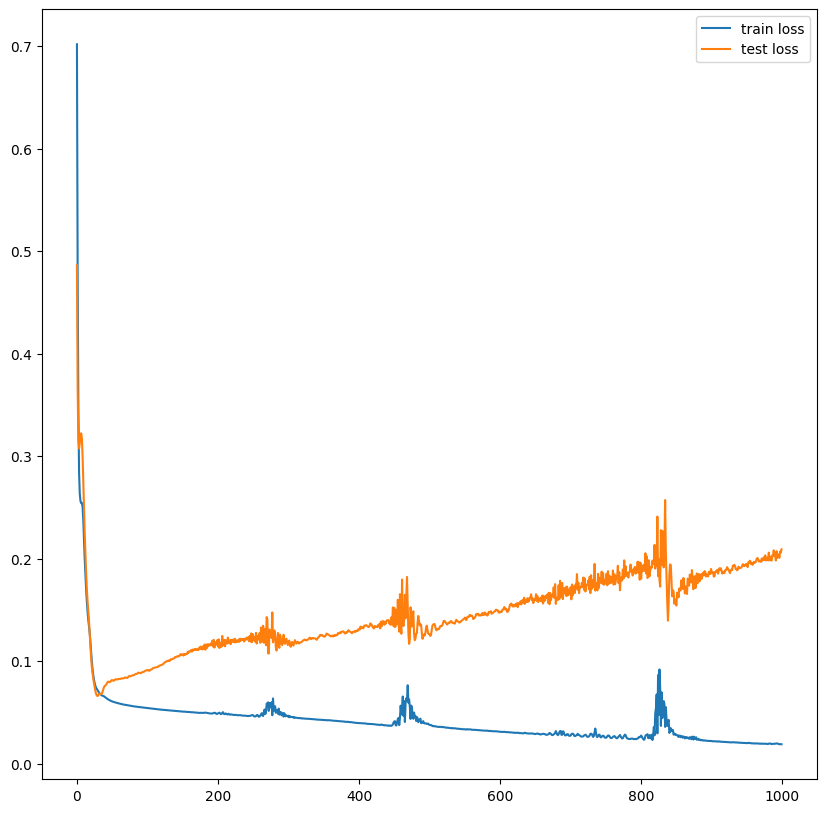

In [52]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [53]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [54]:
model.eval()
X_train = X_train.numpy()
print(type(X_train))

<class 'numpy.ndarray'>


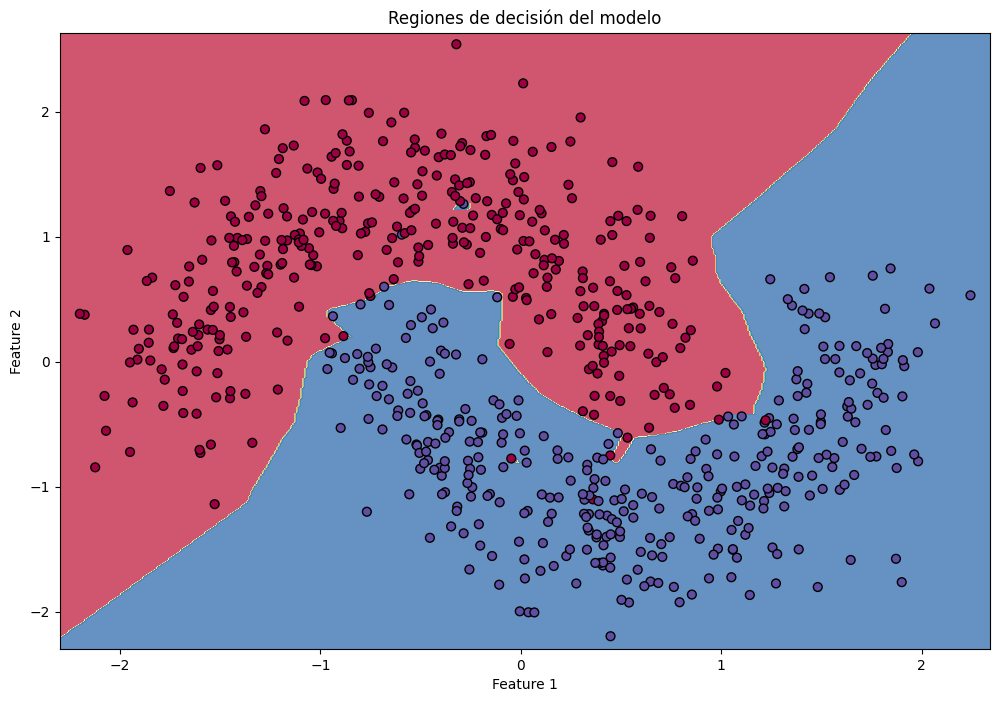

In [56]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    # Define el rango de valores para la malla
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Convierte la malla en un tensor de PyTorch
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_tensor = torch.FloatTensor(mesh_points)  # Conversión a tensor

    # Deshabilita el cálculo de gradientes para acelerar la inferencia
    with torch.no_grad():
        preds = model(mesh_tensor)
        preds = torch.argmax(preds, dim=1).numpy()  # Obtiene la clase predicha

    preds = preds.reshape(xx.shape)

    # Visualiza las regiones de decisión
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Regiones de decisión del modelo")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualiza las predicciones del modelo
plot_decision_boundary(model, X_train, y_train)
